# Experiments on Venmo data

In [1]:
from MNLogit_bfgs_torch import MNLogit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time

In [2]:
from IPython.display import clear_output
%matplotlib inline

In [3]:
PATH = 'venmo-stratified-data-2/'
stratified_filenames = sorted([PATH + x for x in os.listdir(PATH) if '151744' in x and '--1--1' not in x], key=lambda x: int(x.split('-')[-3]))

In [4]:
stratified_filenames

['venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-6-2-2',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-9-3-3',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-12-4-4',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-18-6-6',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-24-8-8',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-36-12-12',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-48-16-16',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-72-24-24',
 'venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-96-32-32']

In [5]:
def fit_filename(s):
  print("Processing " + s)
  num_neg = int(s.split('-')[-3])
  train = pd.read_csv(s, header=None, sep=',').values[:,5:].reshape(-1, num_neg+1, 8)
  sws = -np.log(train[:,:,0] / train[:,:,1])
  Xs = train[:,:,[5]]
  del train
  ys = np.zeros(Xs.shape[0], dtype=int)
  Xs = np.concatenate([np.log(Xs + (Xs==0)), 1*(Xs>0)], axis=2)
  m = MNLogit(num_threads=64)
  m.data(Xs, ys, sws=sws)
  del Xs, ys, sws

  def show(model, info):
    print("Iter {} - {:.1f}s, ET: {:.1f}s, Avg Loss: {:.6f}, |H\\dw|: {:.6f}, Avg |dw| {:.6f}"\
        .format(info['num_iter'], info['iter_time'], info['total_time'], info['avg_loss'], info['inc_norm'], info['avg_grad_norm']))

  m.fit(max_num_iter=300)
  print("Done with " + s)
  return m.get_model_info()

In [6]:
from multiprocessing import Pool
with Pool(9) as p:
  stratified_results = p.map(fit_filename, stratified_filenames)

Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-9-3-3
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-6-2-2
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-24-8-8
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-72-24-24
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-18-6-6
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-12-4-4
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-96-32-32
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-36-12-12
Processing venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-48-16-16
Done with venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-6-2-2
Done with venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-9-3-3
Done with venmo-stratified-data-2/1517443200-1519862400-31536000-0.0100-12-4-4
Done with venmo-stratified-data-2/15174

In [7]:
num_negs = sorted([int(s.split('-')[-3]) for s in stratified_filenames])

In [8]:
# col_names = ["In TXNs","Out TXNs","Unique Friends","Payer to Candidate",
#              "Candidate to Payer","Friends paid Candidate"]
#col_names = ["In TXNs","Payer to Candidate","Friends paid Candidate"]
col_names = ["Payer to Candidate"]

In [9]:
weights = np.array([sr['weights'] for sr in stratified_results]).T
ses = np.array([sr['se'] for sr in stratified_results]).T

Text(0.5,1,'Stratified, coefficient')

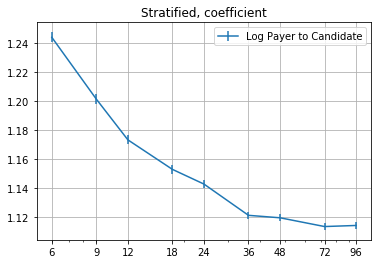

In [10]:
for i in range(1):
  plt.errorbar(x=num_negs, y=weights[i], yerr=ses[i], label='Log ' + col_names[i])

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, coefficient')

Text(0.5,1,'Stratified, coefficient')

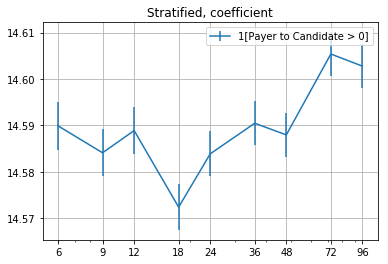

In [11]:
for i in range(1,2):
  plt.errorbar(x=num_negs, y=weights[i], yerr=ses[i], label='1[' + col_names[i%1] + ' > 0]')

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, coefficient')

Text(0.5,1,'Stratified, S.E.')

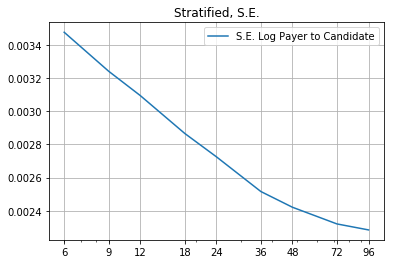

In [12]:
for i in range(1):
  plt.plot(num_negs, ses[i], label='S.E. Log ' + col_names[i%1])

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')

Text(0.5,1,'Stratified, S.E.')

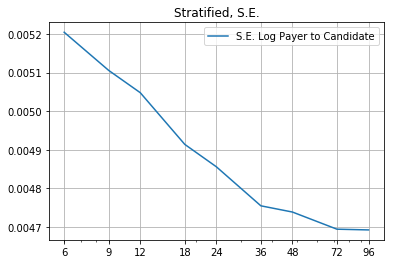

In [13]:
for i in range(1,2):
  plt.plot(num_negs, ses[i], label='S.E. Log ' + col_names[i%1])

plt.xscale('log')
ticks = [6,9,12,18,24,36,48,72,96]
plt.xticks(ticks, ticks)
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Stratified, S.E.')